In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

import os

In [3]:
def create_stocks_sources_coords(num_stocks:int, num_sources:int) -> list:
    inds = np.random.choice(list(range(num_cells_in_row**2)), num_stocks + num_sources)
    return list(zip(inds//num_cells_in_row, inds%num_cells_in_row))

In [4]:
def plot_sample(field):
    fig, ax = plt.subplots(figsize=(8,8),subplot_kw={'xticks': [], 'yticks': []})
    abs_lim = abs(max(field.min(),field.max()))
#     ax.imshow(field[1:-1, 1:-1], cmap=plt.get_cmap('coolwarm'),vmin=-1, vmax=1)
    ax.imshow(field, cmap=plt.get_cmap('coolwarm'),vmin=-abs_lim, vmax=abs_lim)

In [5]:
def set_stocks_sources(field:np.array, coords:list) -> None:
    for sn, (x, y) in enumerate(coords):
        if sn < num_stocks:
            field[x+1,y+1] = -1
        else:
            field[x+1,y+1] = 1

In [58]:
num_cells_in_row = 70
num_stocks = 6
num_sources = 5

num_samples = int(1e5)

CPU times: user 15.2 ms, sys: 2.91 ms, total: 18.1 ms
Wall time: 16 ms


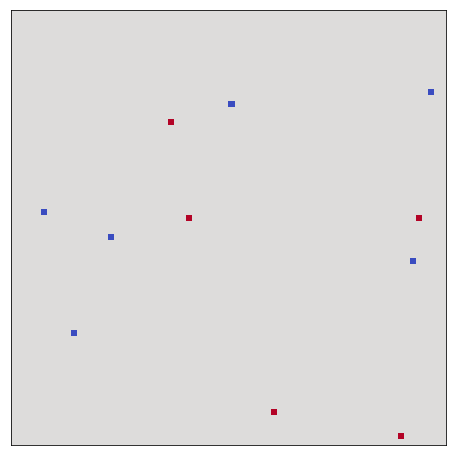

In [59]:
# %%time
stocks_sources_coords_list = []
samples = np.zeros((num_samples, num_cells_in_row+2, num_cells_in_row+2))
for i in range(num_samples):
    stocks_sources_coords_list.append(create_stocks_sources_coords(num_stocks, num_sources))
    set_stocks_sources(samples[i], stocks_sources_coords_list[-1])
    plot_sample(samples[i])
        

In [60]:
save_arrays_path = os.path.join('.', 'results')

X_save_path = os.path.join(save_arrays_path, 'X')
y_save_path = os.path.join(save_arrays_path, 'y')
if not (os.path.exists(save_arrays_path) and os.path.exists(X_save_path) and os.path.exists(y_save_path)):
    os.makedirs(X_save_path)
    os.mkdir(y_save_path)

CPU times: user 974 ms, sys: 51 ms, total: 1.03 s
Wall time: 1.04 s


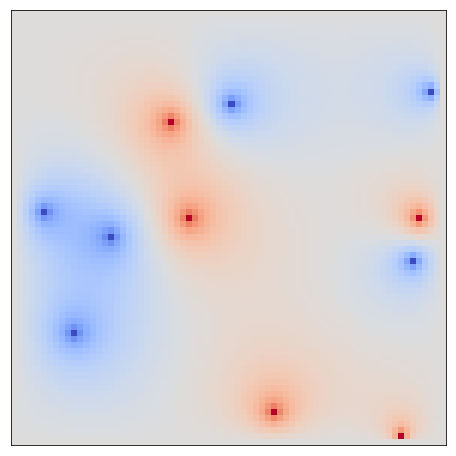

In [63]:
# %%time
const = 0.01
t_lim = 1e5
for i in range(num_samples):
    field = samples[i].copy()
#     plot_sample(field)
    
    ddf = 0
    df_abs = 0
    t = 0
    while True:
        t += 1
        df = const*(                   field[1:-1, :-2]   +
                    field[:-2, 1:-1] - 4*field[1:-1,1:-1] + field[2:, 1:-1] +
                                     + field[1:-1, 2:])
        
        df_abs = np.linalg.norm(df)
        if (abs(df_abs - ddf) < 5e-8):
            np.save(os.path.join(X_save_path, str(i)) , samples[i])
            np.save(os.path.join(y_save_path, str(i)) , field)
#             print(i, t)
            plot_sample(field)
            break
            
        if (t >= t_lim-1):
            print('bad sample #', i)
            break
            
        field[1:-1, 1:-1] += df
        ddf = df_abs
        set_stocks_sources(field, stocks_sources_coords_list[i])